***
  ## **Project Description :** 

<div class="alert alert-block alert-info">
 <b>  
1) We take user input for number of curves to be generated and degree of each curve
    <br>
  
2) We provide an interactive space for plotting points on mouse click which can be modified on click and can be dragged to generate different control polygons.

3) For selected control polygon, B-spline curve is automatically generated in the window to the side.

4) For more than one curve generated, the curves are joined together by virtue of C0 continuity 

5) Final surface can be generated by sweeping the final profile curve, along with slider to control the maximum angle for visualization
</b>
</div>

***

In [1]:
#importing required libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path
from geomdl import BSpline, utilities
from ipywidgets import interact,FloatSlider

### Class and functions for interactive space to plot control polygon and corresponding bspline curve 

In [2]:
# Class used to generate inteactive curves 
class GenerateInteractiveCurve:
    
    def __init__(self, curve, ax, degree):
        # Initializing the axis, canvas, curve and polygon to be generated.
        self.ax = ax
        self.canvas = ax[0].figure.canvas
        self.poly = PolygonSelector(ax[0], self.onselect)
        self.curve = curve
        self.degree = degree

    def onselect(self, verts):
        self.ax[0].set_xlim([0, 1])
        self.ax[0].set_ylim([0, 1])
        path = Path(verts)
        # If no vertices, do not draw anything 
        if (len(verts) == 0):
            pass
        # If only one vertex, clear the old graph and plot new point.
        elif (len(verts) == 1):
            self.ax[1].clear()
            self.ax[1].set_xlim([0, 1])
            self.ax[1].set_ylim([0, 1])
            self.ax[1].scatter(verts, s=100)
        # If more than one vertex, plot the bspline curve using the 
        # give points and degree as defined below.
        else:
            self.ax[1].clear()
            self.ax[1].set_xlim([0, 1])
            self.ax[1].set_ylim([0, 1])
            self.curve.degree = min(self.degree, len(verts)-1)
            self.curve.ctrlpts = verts
            self.curve.knotvector = utilities.generate_knot_vector(
                self.curve.degree, len(self.curve.ctrlpts))

            curve_points = self.curve.evaluate_list(np.linspace(0, 1, 100))
            data = np.asarray(curve_points).T
            controlPoints = np.asarray(self.curve.ctrlpts).T
            self.ax[1].plot(controlPoints[0], controlPoints[1], '--')
            self.ax[1].scatter(controlPoints[0], controlPoints[1], s=100, color = 'blue')
            self.ax[1].plot(data[0], data[1], color = 'red')
        self.canvas.draw_idle()

    def disconnect(self):
        self.poly.disconnect_events()
        self.canvas.draw_idle()
        

#### Taking user input for number of curves to be generated &  the desired degree of each curve followed by interactive subplots

Enter the number of curves to generate.1
Enter the degree of curve no.1 : 1
Select points in the figure by enclosing them within a polygon.
Press the 'esc' key to start a new polygon.
Try holding the 'shift' key to move all of the vertices.
Use CTRL + Z to remove the previous point.
Please enter minimum 2 control points. The curve generated with less than 2 points will have a lesser degree.


<IPython.core.display.Javascript object>


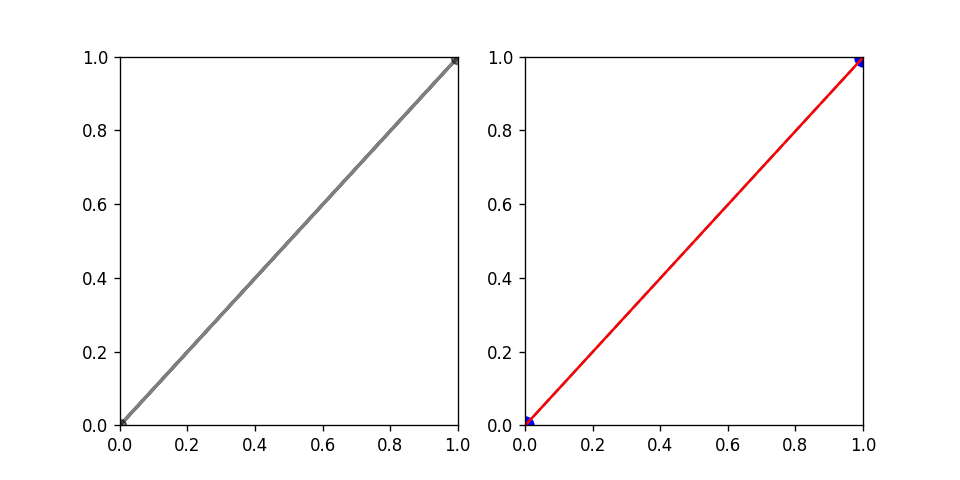

In [3]:
%matplotlib notebook


numCurves = int(input("Enter the number of curves to generate."))
degree = []
for i in range(numCurves):
    degree.append(int(input("Enter the degree of curve no.{} : ".format(i+1))))
curves = []
for i in range(numCurves):
    curves.append(BSpline.Curve())
print("==================================================")
print("Select points in the figure by enclosing them within a polygon.")
print("Press the 'esc' key to start a new polygon.")
print("Try holding the 'shift' key to move all of the vertices.")
print("Use CTRL + Z to remove the previous point.")
print("==================================================")

selector = [None]*numCurves
for i in range(numCurves):
    print("Please enter minimum {} control points. The curve generated with less than {} points will have a lesser degree.".format(degree[i]+1,degree[i]+1))
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    ax[0].set_xlim([0, 1])
    ax[0].set_ylim([0, 1])
    ax[1].set_xlim([0, 1])
    ax[1].set_ylim([0, 1])
    
    selector[i] = GenerateInteractiveCurve(curves[i], ax, degree[i])
    plt.show()
    

## Joining/Merging the curves by establishing C0 continuity 

In [4]:
xArray = []
yArray = []
for i in range(numCurves):
    x = []
    y = []
    for j in curves[i].ctrlpts:
        x.append(j[0])
        y.append(j[1])
    xArray.append(x)
    yArray.append(y)
xDiff = [0]
yDiff = [0]
for i in range(1,len(xArray)):
    xDiff.append(round(xArray[i-1][-1]-xArray[i][0],2))
    yDiff.append(round(yArray[i-1][-1]-yArray[i][0],2)) 
xDiff = list(np.round(np.cumsum(xDiff),2))
yDiff = list(np.round(np.cumsum(yDiff),2))

### Sweeping above profile curve along X axis 

In [5]:
# sweeping along X-axis 
def curve_coordinates(U, V,curve,index):
    X = U.copy()
    for i in range(len(U)):
        temp = np.asarray(curve.evaluate_list(U[i])).T
        X[i] = temp[0] + xDiff[index]
        U[i] = temp[1] + yDiff[index]
    Z = U*np.cos(V)
    Y = U*np.sin(V)
    return (X,Y,Z)

### Plotting wireframe and surface along with slider for angle variation for visualization

<IPython.core.display.Javascript object>


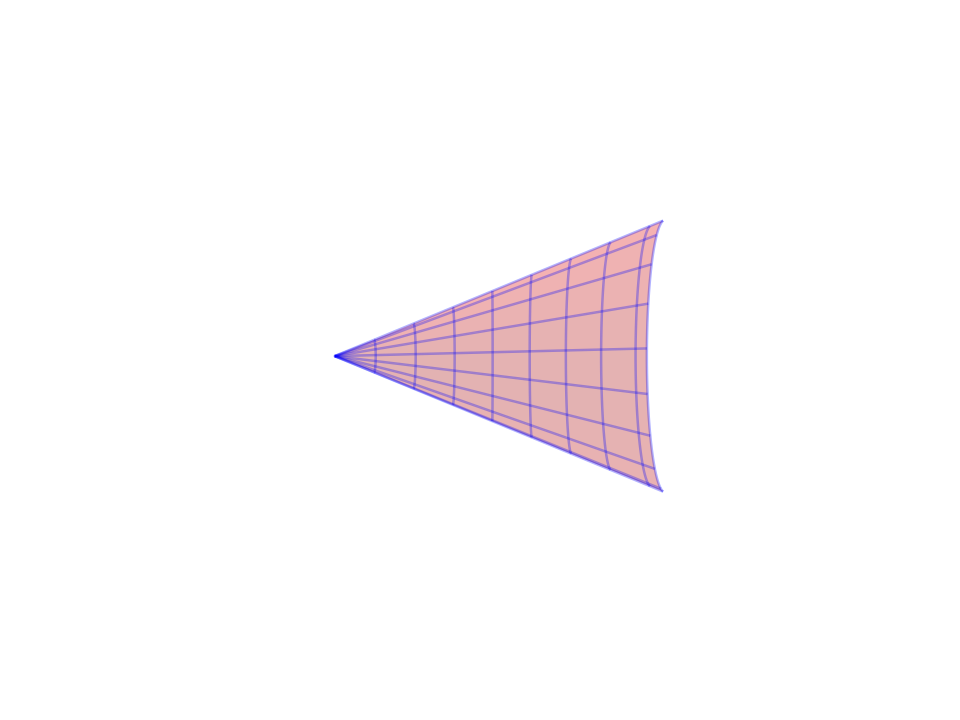

interactive(children=(FloatSlider(value=6.283185307179586, description='angle', max=6.283185307179586, step=0.…

<function __main__.<lambda>(angle)>

In [6]:
def plot_surface_from_curve(angle,curves):
 
    ax.clear()
    
    X = np.array([])
    Y = np.array([])
    Z = np.array([])
    
    for i in range(len(curves)):
        u = np.linspace(0, 1, 101)
        v = np.linspace(0, angle, 101)
        U, V = np.meshgrid(u, v)
        X,Y,Z = curve_coordinates(U, V,curves[i],i)
        ax.plot_surface(X, Y, Z, alpha=0.3, color='red', rstride=12, cstride=12)
        ax.plot_wireframe(X, Y, Z, alpha=0.3, color='blue', rstride=12, cstride=12)

        
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    
    
    ax._axis3don = False
    ax.view_init(elev = 0, azim = 270)
    ax.draw(renderer)


%matplotlib notebook

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
fig.canvas.draw()
renderer = fig.canvas.renderer
ax.draw(renderer)
interact(lambda angle: plot_surface_from_curve(angle, curves), angle = FloatSlider(2*np.pi, min = 0, max = 2*np.pi, step = np.pi/20))

## Find surface area of the generated curve

In [7]:
def findFrustrumSurfaceArea(x1,x2,y1,y2):
    r = (y1+y2)/2
    l = np.sqrt((x2-x1)**2+(y2-y1)**2)
    
    a = 2*np.pi*r*l
    return a

def findSurfaceArea(x,y):
    area = 0
    
    for i in range(1,len(x)):
        area+= findFrustrumSurfaceArea(x[i-1],x[i],y[i-1],y[i])
    return area  

xPoints = []
yPoints = []

paramRange = np.linspace(0,1,1000)

for i in range(len(curves)):
    temp = np.asarray(curves[i].evaluate_list(paramRange)).T
    xTemp = temp[0]+xDiff[i]
    yTemp = temp[1]+yDiff[i]
    xPoints.extend(list(xTemp))
    yPoints.extend(list(yTemp))

print("Surface area of generated curve is : ",findSurfaceArea(xPoints,yPoints))

Surface area of generated curve is :  4.415224707942989


In [ ]:
print(matplotlib_version)